## **Data Science Aplicado a las Finanzas** 🚀
### **Sesión 6: Modelos de Regresión**

Andrés C. Medina Sanhueza

Senior Datascientist Engineer 

anmedinas@gmail.com

In [1]:
from matplotlib import pyplot as plt 
import statsmodels.api as sm
import pandas_datareader.data as web 
import pandas as pd 
import seaborn as sns
import yfinance as yf
import numpy as np

sns.set_style("dark")

## 🐝 ¿Qué es un modelo de regresión?

Un modelo de regresión consiste en un modelo estadístico (en el contexto financiero también es llamado modelo econométrico) que nos permite analizar y cuantificar la relación entre distintas variables (en este contexto, variables económicas o financieras). En particular, se analiza el *efecto que una variación de una variable económica puede tener en la variación de otra variable*.

Algunas aplicaciones:

1. `Macroeconomía` Predicción de variables tales como el PIB, inflación o cuantificar la relación entre tasas de interés-inflación.
2. `Microeconomia` Cuantificar la relación entre educación y salario, factores productivos y producción, gastos en I+D y beneficios de la empresas.
3. `Finanzas` Análisis de volatilidad de los activos, modelos de valoración de activos, etc.  

<div style="border: 1px solid #007acc; background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
   <strong> 📌 Idea Intuitiva  :</strong>  tenemos un fenómeno que está siendo influenciado por otras variables, por lo tanto, creemos que existe algún tipo de relación. Esta creencia que tenemos, debemos plasmarla en algo material, por lo tanto, necesitamos precisarla matemáticamente. Es decir, buscamos saber con la mayor precision posible, cómo funciona esta relación, por otro lado, ¿esta relación, es positiva?, ¿negativa?, ¿es fuerte?, ¿débil?
</div>

## 🦖 Regresión Lineal

Intentamos explicar el comportamiento de cierto fenómeno a través de los siguientes componentes:

* **`variable explicada`** variable explicativa, independiente o a veces llamada regresora.
* **`variable dependiente`** variable dependiente, explicada o regresando.
* **`error`** perturbación aleatoria, error de estimación, shock exógeno.

En el caso de explicar a través de una sola variable $X_1$, tenemos:

\begin{equation*}
Y = f(X_1) + \epsilon
\end{equation*}

En el caso con más variables explicativas $k>1$, 

\begin{equation*}
Y = f(X_1, X_2, X_3, \cdots, X_k) + \epsilon
\end{equation*}

Cuando hablemos de *regresión simple*, estamos hablando de modelos con una sola variable explicativa, es decir:

\begin{equation*}
y = \beta_0 + \beta_1 x_1 + \epsilon
\end{equation*}

La interpretación del modelo anterior, es que la variable $y$ (variable observada) estaría siendo explicada por una constane $\beta_0$, una variable $x_1$ con un coeficiente $\beta_1$ y un error
$\epsilon$.

Por otro lado, cuando hablemos de  *regresión múltiple*, estaremos hablando de modelos con múltiples variables explicativas

\begin{equation*}
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +  \beta_3 x_3 + \cdots  \beta_k x_k + \epsilon
\end{equation*}

La diferencia aquí, es que no solo consideramos $x_1$ para explicar $y$, sino que a todas las 
demás variables explicativas las cuales, cada una de ellas tiene su respectivo coeficiente $\beta_i$

**¿ Qué significan todas estas nomenclaturas ?** 🤔

* $\bf{y}$ es la variable de nuestro interes y se denomina variable explicada o dependiente.
  
* $\bf{x_1,x_2,\cdots,x_k}$ representan a las variables que consideramos relevantes para el análisis de la variable de nuestro interés, y se les denomina variables explicativas. El valor 
de $k$ indica el número de variables explicativas que estamos incluyendo en el modelo. 

* $\bf{\beta_1,\beta_2,\cdots,\beta_k}$ Son constantes que desconocemos su valor, pero que nos gustaría conocer ya que miden el *efecto que las variables regresoras tienen en la variable regresada*. Se les denomina coeficientes del modelo de regresión.

* $\bf{\epsilon}$ 
  * Teoricamente hablando ...
    * Variable aleatoria que perturba una supuesta relación estable entre $y$ y sus variables explicativas $x$, por eso es comunmente llamada perturbacion. 
    * Representa el efecto neto (positivo / negativo) sobre $y$ de todas las infinitas variables que no podemos captar con el modelo. 
  * Empiricamente hablando ...
    * Capta el error en la estimación de los parámetros, el error en la apropiada selección y número de variables explicativas, etc. En pocas palabras, no existe un modelo que explique de manera perfecta el comportamiento de una variable, por lo tanto, en la práctica, asumimos un cierto margen de error $\epsilon$

### Regresión Lineal Simple

**¿Cuál es el objetivo? 😴** 

1. Seleccionar las variables que impactan en $y$ (apoyados en teoría económica, financiera, etc).
2. Encontrar de qué manera y en qué magnitud, impactan estas variables (estimacion de $\beta_i$)
3. Comprobar si el modelo definido es robusto y realmente existe causalidad entre $y$ y las variables que creemos que explican su comportamiento.

En un modelo de regresión lineal podemos observar los valores de la variable dependiente y de las variables independientes. Desconocemos los valores de los coeficientes $\beta_i$ y no podemos observar el término del error $\epsilon$.

El principal objetivo es conocer los valores de los coeficientes, esto, es porque ellos *miden el efecto* que un cambio en su correspondiente variable regresora causa en la variable regresada.

**¿Cómo funciona el modelo?** ☕

Primero, consideremos la tasa de interés del tesoro americano a 10 años (Código FRED: `GS10`) que es la tasa de interés nominal anual que pagan los bonos del tesoro de EE.UU con vencimiento a 10 años. Se considera una tasa libre de riesgo a largo plazo. Por otro lado, consideremos a un ETF de bonos del Tesoro de largo plazo (Ticker Yahoo: `TLT`) que es es un fondo cotizado (ETF) que invierte exclusivamente en bonos del Tesoro de EE.UU. con vencimientos mayores a 20 años. 


<div style="display: flex; justify-content: space-around;">
  <img src="scatterplot.png" alt="Imagen 1" width = "300">
  <img src="scatterplot2.png" alt="Imagen 2" width = "300">
</div>

Cuando la tasa de interés sube (GS10), los bonos existentes en el mercado (como los que tiene TLT) pagan un cupón fijo que ahora es menos atractivo que las nuevas tasas del mercado. Por tanto, para igualar el atractivo, su precio de mercado baja. Cuando baj la tasa de interés (GS10), los bonos existentes, con cupones más altos que los nuevos bonos, se vuelven más valiosos, por tanto el precio del bono sube, y con ello sube TLT (relación lineal negativa).

**Idea 📌** Minimizar el error entre la observación $y_i$ y lo que se ajusta $\hat{y}$, es decir, debemos construir una forma en que, la distancia entre lo que se observa y lo que se ajusta, sea lo mas mínimo o pequeño posible (minimizar $\epsilon_i = y_i - \hat{y}$). Sin embargo, debido a que no existen distancias negativas, debemos ser capaces de construir una forma de que las distancias sean mayores que 0, es decir

\begin{equation*}
\epsilon_{i}^2 = (y_i - \hat{y})^2
\end{equation*}

Cabe destacar que la expresión anterior, es para un punto específico del diagrama de dispersión, sin embargo, debemos generalizarlo para todos los puntos del diagrama, por ende, debemos cuantificar el error de todos los puntos.

\begin{equation*}
\sum_{i=1}^{n}\epsilon_{i}^2 = \sum_{i=1}^{n}(y_i - \hat{y})^2
\end{equation*}

Por tanto, tenemos un modelo teorico definido como $y_i = \beta_0 + \beta_1 x_i + \epsilon$ y tenemos un modelo *ajustado* $\hat{y} = \widehat{\beta_0} + \widehat{\beta_1} x_i$, por lo tanto, la funcion a minimizar es: 

\begin{equation*}
S := \sum_{i=1}^{n}\epsilon_{i}^2 = \sum_{i=1}^{n}(y_i -  \widehat{\beta_0} - \widehat{\beta_1} x_i)^2
\end{equation*}

### Métodos de Estimación

#### Mínimos cuadrados

Vamos a explicar el método para hallar las estimaciones $\widehat{\beta_0}$ y $\widehat{\beta_1}$. Dicho método se conoce como *mínimos cuadrados*.

Dada una observación cualquiera de la muestra, $(x_i,y_i)$, podremos separar la componente $y_i$ como la suma de su valor predicho por el modelo y el error cometido: 

\begin{equation*}
y_i= \beta_0 + \beta_1 x_i + \epsilon_i \rightarrow \epsilon_i = y_i-(\beta_0+\beta_1x_i)
\end{equation*}

Llamamos **error cuadrático teórico** de este modelo a la suma al cuadrado de todos los errores cometidos por los valores de la muestra: 

\begin{equation*}
SS_E=\sum_{i=1}^n\epsilon_i^2=\sum_{i=1}^n(y_i-(\beta_0+\beta_1x_i))^2
\end{equation*}

La regresión lineal por mínimos cuadrados consiste en hallar los estimadores $\widehat{\beta_0}$ y $\widehat{\beta_1}$ que minimicen el error cuadrático teórico. Es sencillo demostrar que los valores que optimizan son 

\begin{equation*}
\widehat{\beta_{1}} = \frac{\sum_{i=1}^{n}(x_i -\overline{x})(y_i - \overline{y})}{\sum_{i=1}^n (x_i - \overline{x})^2} \quad \widehat{\beta_{0}} = \overline{y} - \widehat{\beta_1}\overline{x}
\end{equation*}

En estricto rigor, el estimador MCO es un procedimiento para determinar, aproximadamente los valores reales de los coeficientes del modelo de regresión simple $\beta_0$ y $\beta_1$ a partir de los datos de una muestra de las variables. El estimador se basa en una fórmula que aplicada a los datos de la *muestra* proporciona estimaciones de los coeficientes del modelo de regresión.

\begin{equation*}
\min_{\widehat{\beta_0}, \widehat{\beta_1}}\sum_{i=1}^n\epsilon_i^2=\sum_{i=1}^n(y_i-(\widehat{\beta_0}+\widehat{\beta_1}x_i))^2
\end{equation*}


In [2]:
from matplotlib import pyplot as plt 
import pandas_datareader.data as web
import statsmodels.api as sm
import statsmodels.formula.api as smf
import yfinance as yf 
import pandas as pd 
import seaborn as sns 
import numpy as np 

sns.set_style("dark")

In [3]:
# Descargar los datos
bond_price = yf.download('TLT', start='2015-01-01', end='2024-01-01', progress = False)['Close']
t10y = web.DataReader('GS10', 'fred', '2015-01-01', '2024-01-01')

# Resampleo mensual
bond_monthly = bond_price.resample('M').last()
t10y_monthly = t10y.resample('M').last()

# Merge
df = pd.concat([bond_monthly, t10y_monthly], axis=1)
df.columns = ['Precio_TLT', 'Tasa10Y']
df = df.dropna()

YF.download() has changed argument auto_adjust default to True


In [4]:
df.head()

,Precio_TLT,Tasa10Y
2015-01-31,105.614151,1.88
2015-02-28,99.131187,1.98
2015-03-31,100.213928,2.04
2015-04-30,96.781410,1.94
2015-05-31,94.485329,2.20


In [5]:
# Implementacion manual de estimadores
xbar = df['Tasa10Y'].mean()
ybar = df['Precio_TLT'].mean()

beta_1 = np.sum((df['Tasa10Y']-xbar)*(df['Precio_TLT']-ybar)) / np.sum((df['Tasa10Y'] - xbar)**2)
beta_0 = ybar - beta_1*xbar 

In [6]:
print(f"(intercepto): {beta_0:.4f}")
print(f"(pendiente): {beta_1:.4f}")

(intercepto): 142.8554
(pendiente): -14.8853


In [7]:
# Estimacion mediante statsmodels
model = smf.ols(formula = 'Precio_TLT ~ Tasa10Y', data = df).fit()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Precio_TLT   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     247.4
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           1.77e-29
Time:                        15:59:37   Log-Likelihood:                -390.02
No. Observations:                 108   AIC:                             784.0
Df Residuals:                     106   BIC:                             789.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    142.8554      2.335     61.178      0.000     138.226     147.485
Tasa10Y      -14.8853      0.946    -15.728      0.000     -16.762     -13.009
==============================================================================
Omnibus:                       24.274   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.852
Skew:                          -0.383   Prob(JB):                       0.0197
Kurtosis:                       1.924   Cond. No.                         7.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

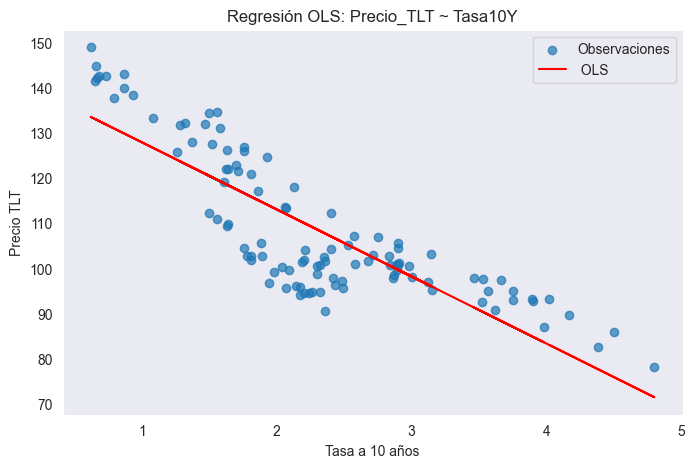

In [9]:
# Genero la prediccion con el  modelo ols 
df['Predicted_TLT'] = model.predict(df)

# Visualizacion de la estimacion
plt.figure(figsize=(8, 5))
plt.scatter(df['Tasa10Y'], df['Precio_TLT'], alpha = 0.7, label = 'Observaciones')
plt.plot(df['Tasa10Y'], df['Predicted_TLT'], color='red', label = ' OLS')
plt.xlabel('Tasa a 10 años')
plt.ylabel('Precio TLT')
plt.title('Regresión OLS: Precio_TLT ~ Tasa10Y')
plt.legend()
plt.show()

👀 **¿ De qué manera afecta la relación ?**

Otra forma de escribir la pendiente del modelo, $\beta_1$ es de la siguiente forma: 

\begin{equation*}
\widehat{\beta_1} = \frac{\textsf{Cov}(x,y)}{\textsf{Var}(x)}
\end{equation*}

La covarianza $\textsf{Cov}(x,y)$ es una medida numerica que indica si existe o no , relacion lineal entre dos variables. 

Un estimador muestral insesgado de la covarianza $S_{xy}$ esta dado por : 

\begin{equation*}
S_{xy} = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \overline{x})(y_{i} - \overline{y})
\end{equation*}

* Si $S_{xy}>0$ existe dependencia directa o positiva
* Si $S_{xy}=0$ no existe relacion lineal 
* Si $S_{xy}<0$ existe dependencia inversa o negativa 

A diferencia de la covarianza, que mide la relación (si es que existe), entre dos variables en términos de dirección, la correlación mide la magnitud o fuerza de la relación. El estimador insesgado del coeficiente de correlación para una muestra con $n$ observaciones viene dado por:

\begin{equation*}
r_{xy} = \frac{S_{xy}}{S_x S_y} = \frac{1}{n-1}\frac{\sum_{i=1}^{n}x_{i}y_{i} - n\overline{x}\overline{y}}{S_x S_y}
\end{equation*}

* Si $r_{xy} = 1$ existe correlacion positiva o directa perfecta
* Si $0 < r_{xy} < 1$ existe correlacion positiva 
* Si $r_{xy} = 0$ no existe correlacion lineal
* Si $-1 < r_{xy} < 0$  existe correlacion negativa
* Si $r_{xy} = -1$ existe correlacion negativa o inversa perfecta

## 🦊 Supuestos de Gauss-Markov

Los supuestos de Gauss-Markov son los supuestos básicos del modelo de regresión simple; supuestos necesarios para que los valores obtenidos mediante el estimador MCO sean considerados fiables

### 📌 S1. Linealidad

Existe una relación lineal entre la variable explicada y la explicativa. Cuando nos referimos a modelo de regresión lineal nos estamos refiriendo a linealidad con respecto a los coeficientes $\beta_0$ y $\beta_1$ , y no con respecto a las variables.

### 📌 S2. Muestra Aleatoria

La muestra tomada de las variables aleatorias $\{x_i,y_i\}$, con $i=1,2,\cdots,N$ debe ser una muestra aleatoria que sigue el modelo de regresión lineal $y=\beta_0 + \beta_1x + \epsilon_i$

### 📌 S3. Varianza constante 

Los valores de la variable explicativa $x_i$ no pueden ser todas iguales es decir, $x$ no puede ser constante

### 📌 S4. Exogeneidad

$\mathbb{E}(\epsilon_i | x_i) = 0$ para $i=1\cdots N$, esto es equivalente a decir que 
$\mathbb{E}(y_i | x_i) = \beta_0 + \beta_1 x_i$ para $i=1\cdots N$. A la expresion $\mathbb{E}(y_i | x_i) = \beta_0 + \beta_1 x_i$ se le denomina recta de regresion poblacional.

Las perturbaciones son *sorteos aleatorios* de una poblacion. Dado que no tenemos informacion util para predecir el valor de la perturbacion, y con el fin de no tener ningun sesgo, asumiremos que las perturbaciones $\epsilon_i \sim\mathcal{N}(0,\sigma^2)$, esto significa que las perturbaciones tienen valor esperado condicional 0 con respecto a cualquier observacion, es decir $\mathbb{E}(\epsilon_i | x_i) = 0$. Factores no incluidos explicitamente en el modelo y por consiguiente incorporados en $\epsilon_i$, no afectan sistematicamente el valor de la media de $y$.

Si la media condicionada de una variable aleatoria, dada otra variable aleatoria es cero entonces su covarianza también es cero, esto implica que las dos variables no estan correlacionadas y por lo tanto, este supuesto nos dice que $x_i$ y $\epsilon_i$ no esten correlacionadas. 

### 📌 S5. Homocedasticidad

La varianza del error es constante para todas las observaciones en la muestra, es decir:

\begin{equation*}
\begin{aligned}
\textsf{Var}(\epsilon_i | x_i) &= \sigma^2 \\
\textsf{Cov}(\epsilon_i, \epsilon_j | x) &= \mathbb{E}(\epsilon_i \epsilon_j | x) = 0
\end{aligned}
\end{equation*}

Esto significa que la variación alrededor de la línea de regresión, es la misma para todos los valores de $x$; no aumenta ni disminuye conforme varía $x$.

## 🐙 Distribuciones muestrales de los estimadores MCO

Las propiedades estadísticas de los estimadores MCO se derivan de su fórmula y de los supuestos del modelo lineal.

\begin{equation*}
\widehat{\beta_{1}} = \frac{\sum_{i=1}^{n}(x_i -\overline{x})(y_i - \overline{y})}{\sum_{i=1}^n (x_i - \overline{x})^2} \quad \widehat{\beta_{0}} = \overline{y} - \widehat{\beta_1}\overline{x}
\end{equation*}

El estimador MCO es insesgado.

\begin{equation*}
\mathbb{E}(\widehat{\beta_0} | x) = \beta_0 ,\quad \mathbb{E}(\widehat{\beta_1} | x) = \beta_1
\end{equation*}

Las varianzas de los estimadores MCO son:

\begin{equation*}
\begin{aligned}
\textsf{Var}(\widehat{\beta_1}) & = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i - \overline{x})^2} = \frac{\sigma^2}{(n-1)S_{x}^2} \\ 
\textsf{Var}(\widehat{\beta_0}) & = \frac{\sigma^2 \sum_{i=1}^{n}x_{i}^2}{\sum_{i=1}^{n}(x_i - \overline{x})^2} = \frac{\sigma^2 \overline{x}^2}{(n-1)S_{x}^2} 
\end{aligned}
\end{equation*}

* Cuanto mayor es la varianza del término del error ,$\sigma^2$, mayor es la varianza de $\widehat{\beta_1}$, si la varianza de la parte no observable que afecta a $y$ es muy grande, es muy difícil de estimar $\beta_1$ con precisión.

* Cuanto mayor es la varianza de las $x_i$ ,menor es la varianza de $\widehat{\beta_1}$, si las $x_i$ tienen muy poca dispersión es muy difícil de estimar β1 con precisión.

* Cuanto mayor es el tamaño muestral, menor es la varianza de $\widehat{\beta_1}$.

* Cuanto mayor sea $R_{j}^2$ (la correlación del regresor con el resto de los regresores), mayor será la varianza de $\widehat{\beta_j}$.

In [10]:
# Función para simular y estimar var(beta_1)
def simulate_var_beta1(n, var_x, sigma, seed = 0):
    np.random.seed(seed)
    x = np.random.normal(0, np.sqrt(var_x), n)
    epsilon = np.random.normal(0, sigma, n)
    y = 2 * x + epsilon  # beta_0 = 0, beta_1 = 2

    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    var_beta1 = model.bse[1]**2
    r_squared = model.rsquared
    return var_beta1, r_squared

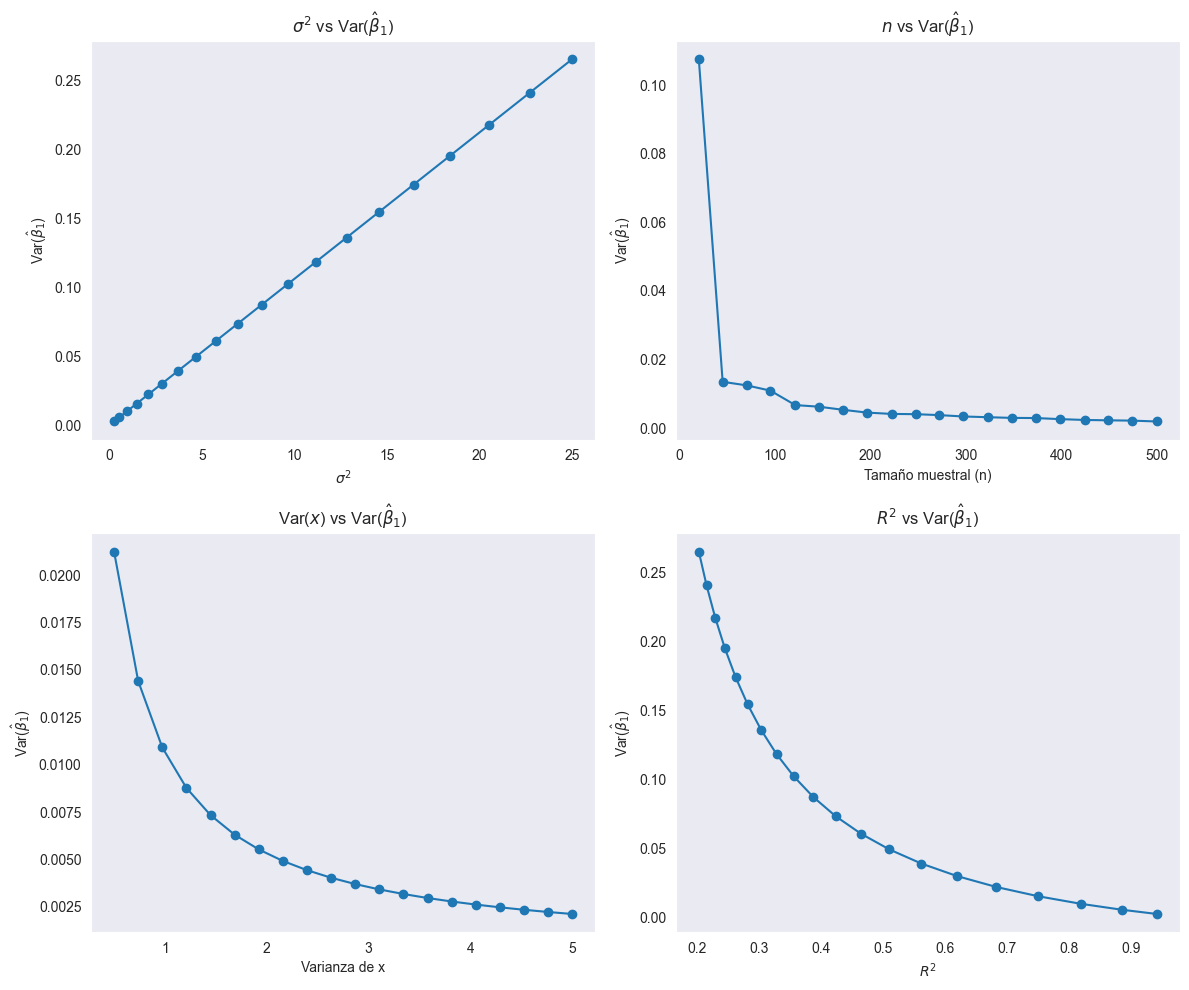

In [11]:
# Configuraciones a probar
sigmas = np.linspace(0.5, 5, 20)
Ns = np.linspace(20, 500, 20, dtype = int)
var_xs = np.linspace(0.5, 5, 20)
r2_values = []

# Almacenar resultados
var_beta_sigma = []
var_beta_n = []
var_beta_varx = []
var_beta_r2 = []

# Experimento 1: sigma^2 vs Var(beta_1)
for sigma in sigmas:
    var_beta1, _ = simulate_var_beta1(n=100, var_x=1, sigma=sigma)
    var_beta_sigma.append((sigma**2, var_beta1))

# Experimento 2: N vs Var(beta_1)
for n in Ns:
    var_beta1, _ = simulate_var_beta1(n=n, var_x=1, sigma=1)
    var_beta_n.append((n, var_beta1))

# Experimento 3: Var(x) vs Var(beta_1)
for var_x in var_xs:
    var_beta1, _ = simulate_var_beta1(n=100, var_x=var_x, sigma=1)
    var_beta_varx.append((var_x, var_beta1))

# Experimento 4: R^2 vs Var(beta_1)
# Para forzar distintos R^2, controlamos sigma
for sigma in sigmas:
    var_beta1, r2 = simulate_var_beta1(n=100, var_x=1, sigma=sigma)
    var_beta_r2.append((r2, var_beta1))

# --- Graficar los resultados ---
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1: sigma^2 vs Var(beta_1)
x1, y1 = zip(*var_beta_sigma)
axs[0, 0].plot(x1, y1, 'o-')
axs[0, 0].set_title(r"$\sigma^2$ vs Var($\hat\beta_1$)")
axs[0, 0].set_xlabel(r"$\sigma^2$")
axs[0, 0].set_ylabel(r"Var($\hat\beta_1$)")

# Subplot 2: N vs Var(beta_1)
x2, y2 = zip(*var_beta_n)
axs[0, 1].plot(x2, y2, 'o-')
axs[0, 1].set_title(r"$n$ vs Var($\hat\beta_1$)")
axs[0, 1].set_xlabel("Tamaño muestral (n)")
axs[0, 1].set_ylabel(r"Var($\hat\beta_1$)")

# Subplot 3: Var(x) vs Var(beta_1)
x3, y3 = zip(*var_beta_varx)
axs[1, 0].plot(x3, y3, 'o-')
axs[1, 0].set_title(r"Var($x$) vs Var($\hat\beta_1$)")
axs[1, 0].set_xlabel("Varianza de x")
axs[1, 0].set_ylabel(r"Var($\hat\beta_1$)")

# Subplot 4: R^2 vs Var(beta_1)
x4, y4 = zip(*var_beta_r2)
axs[1, 1].plot(x4, y4, 'o-')
axs[1, 1].set_title(r"$R^2$ vs Var($\hat\beta_1$)")
axs[1, 1].set_xlabel(r"$R^2$")
axs[1, 1].set_ylabel(r"Var($\hat\beta_1$)")

plt.tight_layout()
plt.show()

Las varianzas de $\widehat{\beta_0}$ y $\widehat{\beta_1}$ dependen de los valores muestrales de las $x_i$ que son observables y de la varianza del término del error, $\sigma^2$ que es un parámetro desconocido, por lo tanto, para poder estimar la varianza de $\widehat{\beta_0}$ y $\widehat{\beta_1}$ primero tenemos que obtener un estimador de $\sigma^2$.

Dado que $\sigma^2$ es la varianza del termino de error $\epsilon$ , que como mostramos anteriormente, coincide con la esperanza de $\epsilon^2$ , podriamos utilizar la media muestral de los errores al cuadrado como estimador de $\sigma^2$.

\begin{equation*}
\widehat{\sigma^2} = \frac{1}{n}\sum_{i=1}^{n}\epsilon_{i}^2
\end{equation*}

El problema, es que no se puede calcular ya que los *errores son no observados*. Sin embargo, lo que si podemos calcular, son los residuos $\widehat{\epsilon}$.

#### 📌 Valores Ajustados y Residuos

Consideremos de nuevo el modelo de regresión lineal simple

\begin{equation*}
y_i= \beta_0 + \beta_1 x_i + \epsilon_i 
\end{equation*}

Llamaremos *valores ajustado* a los valores de la variable explicada que obtenemos siguiendo el modelo de regresión lineal simple con los valores de los coeficientes estimados.

\begin{equation*}
\widehat{y_i} = \widehat{\beta_0} + \widehat{\beta_1} x_i 
\end{equation*}

<tr>
<center>
<td><img src="fit_residuals.png" style="width: 600px;"/> </td>
</center>
</tr>

A la diferencia entre el valor observado y el valor ajustado de la variable explicada, se le denomina *residuo*

\begin{equation*}
\widehat{\epsilon_i} = y_{i} - \widehat{y} = y_i - (\widehat{\beta_0} + \widehat{\beta_1} x_i) 
\end{equation*}

Algunas propiedades 

* La suma de los residuos es siempre cero : $\sum_{i=1}^{N}\widehat{\epsilon_i} = 0$

* La covarianza muestral entre la variable regresora $x$ y los residuos $\widehat{\epsilon}$
es cero, es decir $\sum_{i=1}^{N}x_i\widehat{\epsilon_i} = 0$

* La covarianza muestral entre los valores ajustados y los residuos es 0, es 
decir  $\sum_{i=1}^{N}\widehat{y_i}\widehat{\epsilon_i} = 0$

---

La varianza muestral es un estimador de la varianza muestral del error : 

\begin{equation*}
\widehat{\sigma^2} = \frac{1}{n-2}\sum_{i=1}^{n}\widehat{\epsilon_i} ^ 2
\end{equation*}

Utilizando este estimador para $\sigma^2$, se definen las varianzas estimadas de $\widehat{\beta_1}$ y $\widehat{\beta_0}$

\begin{equation*}
\textsf{Var}(\widehat{\beta_1}) =  \frac{\widehat{\sigma^2}}{(n-1)S_{x}^2}, \quad 
\textsf{Var}(\widehat{\beta_0}) = \frac{\widehat{\sigma^2} \overline{x}^2}{(n-1)S_{x}^2}
\end{equation*}

## 🪼 Bondad de Ajuste 

Necesitamos una medida que nos indique cómo de bien se ajustan los valores estimados a partir de la variable independiente a los valores observados de la variable dependiente. Es decir, una medida que nos indique que tan bien, la variable independiente explica los valores observados de la variable dependiente. Una medida de bondad de ajuste es el coeficiente de determinación $R^2$.

Recordemos que, una de las propiedades del estimador MCO es que

\begin{equation*}
\widehat{\epsilon}^2 = (y_i - \widehat{y_i})^2 
\end{equation*}

Si restamos $\overline{y}$ a ambos lados de la igualdad, y aplicamos sumatoria, tenemos la siguiente igualdad.

\begin{equation*}
\underbrace{\sum_{i=1}^{n}(y_i - \widehat{y_i})^2}_{\textsf{SCT}}  = \underbrace{\sum_{i=1}^{n}(\widehat{y_i}-\overline{y})^2}_{\textsf{SCE}} + \underbrace{\sum_{i=1}^{n}\widehat{\epsilon}^2}_{\textsf{SCR}}
\end{equation*}

Donde $\textsf{SCT}$ es la suma cuadrática total,  $\textsf{SCE}$ es la suma cuadrática explicada y $\textsf{SCR}$ suma cuadrática de los residuos. Diviendo por $\textsf{SCT}$ y mediante un arreglo algebraico, tenemos lo siguiente: 

\begin{equation*}
R^2 = \frac{\textsf{SCE}}{\textsf{SCT}} = 1 - \frac{\textsf{SCR}}{\textsf{SCT}}
\end{equation*}

El coeficiente de determinación $R^2$ mide la proporción de la variabilidad de la variable dependiente que es explicada por la variable independiente. Notar que el valor de $R^2$ siempre esta comprendido entre 0 y 1.


In [12]:
df.head()

,Precio_TLT,Tasa10Y,Predicted_TLT
2015-01-31,105.614151,1.88,114.871041
2015-02-28,99.131187,1.98,113.382508
2015-03-31,100.213928,2.04,112.489389
2015-04-30,96.781410,1.94,113.977921
2015-05-31,94.485329,2.20,110.107738


In [13]:
# Construyo vectores  X e Y 
x = df['Tasa10Y']
y = df['Precio_TLT']

# Calculo media de las variables X e Y 
xbar = x.mean()
ybar = y.mean()

# Obtengo los betas del modelo 
beta_1 = np.sum((x - xbar) * (y - ybar)) / np.sum((x - xbar)**2)
beta_0 = ybar - beta_1 * xbar

# Calculo Predicciones
y_hat = df['Predicted_TLT'] # usar los del modelo anterior
# y_hat = beta_0 + beta_1 * x # o construirlos 

# Paso 4: Calcular SSR y SST
SSR = np.sum((y - y_hat)**2)
SST = np.sum((y - ybar)**2)

# Paso 5: Calcular R²
R2 = 1 - SSR / SST

print(f"Coeficiente de determinación R² = {R2:.4f}")

Coeficiente de determinación R² = 0.7000


In [14]:
model = smf.ols(formula = 'Precio_TLT ~ Tasa10Y', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Precio_TLT   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     247.4
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           1.77e-29
Time:                        15:59:38   Log-Likelihood:                -390.02
No. Observations:                 108   AIC:                             784.0
Df Residuals:                     106   BIC:                             789.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    142.8554      2.335     61.178      0.000     138.226     147.485
Tasa10Y      -14.8853      0.946    -15.728      0.000     -16.762     -13.009
==============================================================================
Omnibus:                       24.274   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.852
Skew:                          -0.383   Prob(JB):                       0.0197
Kurtosis:                       1.924   Cond. No.                         7.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model.rsquared

0.7000381288866471

## 🐤 Pruebas de Hipótesis

Recordar que tanto los coeficientes $\beta$ como la varianza del error $\sigma^2$ no se observan nunca (no conocemos su valor). Por tanto, a partir de una muestra aleatoria , y de las formulas construidas del estimador MCO obtenemos valores estimados para $\widehat{\beta_j}$ y $\widehat{\sigma^2}$

La inferencia, es una parte de la estadística que nos permite contrastar si podemos rechazar o no, una hipótesis sobre el parámetro del modelo. Como no conocemos los valores de los coeficientes la decisión de rechazar o no una hipótesis sobre los parámetros va a depender de los valores estimados de los parámetros. Además, necesitaremos saber las distribuciones estadísticas de los estimadores MCO de los parámetros. Anteriormente, vimos que:

\begin{equation*}
\begin{aligned}
\mathbb{E}(\widehat{\beta_0}) &= \beta_0 \quad \textsf{Var}(\widehat{\beta_0}) = \frac{\widehat{\sigma^2} \overline{x}^2}{(n-1)S_{x}^2} \\
\mathbb{E}(\widehat{\beta_1}) &= \beta_1 \quad \textsf{Var}(\widehat{\beta_1}) =  \frac{\widehat{\sigma^2}}{(n-1)S_{x}^2}
\end{aligned}
\end{equation*}

Para conocer la distribución de $\beta_j$. tenemos que suponer una distribución al termino del error. 

### 📌 S6. Normalidad

El término del error $\epsilon$ es independiente de las variables regresoras $x_1, x_2,\cdots, x_k$ y se distribuye $\epsilon_i \sim \mathcal{N}(0,\sigma^2)$. A partir de las distribuciones de $\epsilon$ podremos obtener las distribuciones de $y,\hat{y},\widehat{\beta_j}, \widehat{\sigma^2}$ condicionada a los valores de la muestra de las variables regresoras $x_1, x_2,\cdots, x_k$.

---

Con el supuesto anterior, podemos construir las distribuciones correspondientes:

* Distribución de $y$ condicionada a los valores de la muestra de la variable regresora. 

\begin{equation*}
y_{i}|x \sim \mathcal{N}(\beta_0 + \beta_1x_{1}, \sigma^2)
\end{equation*}

* Distribición de $\beta_j$ condicionada a los valores de la muestra de la variable regresora.

\begin{equation*}
\begin{aligned}
\widehat{\beta_0} &\sim \mathcal{N}\left(\beta_0, \frac{\sigma^2 \overline{x}^2}{(n-1)S_{x}^2}  \right) \\
\widehat{\beta_1} &\sim  \mathcal{N}\left(\beta_1, \frac{\sigma^2}{(n-1)S_{x}^2} \right)
\end{aligned}
\end{equation*}

* Distribución de $\widehat{\sigma^2}$ condicionada a los valores de la muestra de la variable regresora.

\begin{equation*}
\frac{(n-k-1)\widehat{\sigma^2}}{\sigma^2} \sim \chi_{n-k-1}^2
\end{equation*}

Donde $ \chi_{n-k-1}^2$ es una distribución chi-cuadrado con $n-k-1$ grados de libertd. Además, se cumple que bajo el supuesto de normalidad S6, $\widehat{beta_j}$ y $\widehat{\sigma^2}$ son independientes. 

Esta propiedad es clave puesto que es necesaria para obtener la siguiente distribución para cada coeficiente de regresión.

\begin{equation*}
\frac{\widehat{\beta_j}-\beta_j}{\textsf{SE}(\beta_j)} \sim t_{n-k-1} \quad \textsf{t-ratio}
\end{equation*}

Donde $t_{n-k-1}$ es una distribución $t$-student con $n-k-1$ grados de libertad. 

In [16]:
# calculo de t-ratio 

# construyo vectores  X e Y 
x = df['Tasa10Y']
y = df['Precio_TLT']
n = len(x)

# calculo media de las variables X e Y 
xbar = x.mean()
ybar = y.mean()

Sxx = np.sum((x - xbar)**2)
Sxy = np.sum((x - xbar) * (y - ybar))

# obtengo los betas del modelo 
beta_1 = np.sum((x - xbar) * (y - ybar)) / np.sum((x - xbar)**2)
beta_0 = ybar - beta_1 * xbar

# calculo predicciones
y_hat = df['Predicted_TLT'] 

# residuos 
residuals = y - y_hat

# calculo de sigma^2
sigma2_hat = np.sum(residuals**2) / (n - 2)

# errores estandar
se_beta_1 = np.sqrt(sigma2_hat / Sxx)
se_beta_0 = np.sqrt(sigma2_hat * (1/n + xbar**2 / Sxx))

# t-ratios
t_beta_1 = beta_1 / se_beta_1
t_beta_0 = beta_0 / se_beta_0

# Imprimir resultados
print(f"beta_1 = {beta_1:.4f}, SE = {se_beta_1:.4f}, t = {t_beta_1:.4f}")
print(f"beta_0 = {beta_0:.4f}, SE = {se_beta_0:.4f}, t = {t_beta_0:.4f}")

beta_1 = -14.8853, SE = 0.9464, t = -15.7283
beta_0 = 142.8554, SE = 2.3351, t = 61.1779


In [17]:
# estimador de la varianza de los errores 
sigma2_hat

81.72248232476242

In [18]:
model = smf.ols(formula = 'Precio_TLT ~ Tasa10Y', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Precio_TLT   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     247.4
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           1.77e-29
Time:                        15:59:38   Log-Likelihood:                -390.02
No. Observations:                 108   AIC:                             784.0
Df Residuals:                     106   BIC:                             789.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    142.8554      2.335     61.178      0.000     138.226     147.485
Tasa10Y      -14.8853      0.946    -15.728      0.000     -16.762     -13.009
==============================================================================
Omnibus:                       24.274   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.852
Skew:                          -0.383   Prob(JB):                       0.0197
Kurtosis:                       1.924   Cond. No.                         7.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# estimador de la varianza de los errores (statsmodels)
model.scale

81.72248232476244

**Ejercicio 🖍️**

*Para este ejercicio, no considere ninguna semilla aleatoria.*

Suponga que ud. quiere estudiar la relación entre $x$ e $y$ mediante el modelo $y=\beta_0 + \beta_1 x + \epsilon$. Para ello, asume que los verdaderos valores de los parámetros poblacionales son $\beta_0$ = 1 y $\beta_2$=2 y el componente de error proviene de una distribución $\epsilon\sim\mathcal{N}(0,4)$. La idea de este ejercicio, es elegir uno de estos dos posibles estimadores 

\begin{equation*}
\beta^{*} = \frac{\sum y_i}{\sum x_i}, \quad 
\tilde{\beta} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
\end{equation*}

a) Escoja 100 valores de $x$ usando ``scipy`` para generar a partir de una distribución uniforme entre 5 y 20.

b) Acto seguido, genere 100 observaciones aleatorias de $\epsilon$  a partir de una distribución normal con media 0 y varianza 4.

In [20]:
from scipy.stats import uniform, norm

# Parámetros de Inicialización
nobs   = 100   # Observaciones
sims   = 5000  # Num. Simulaciones
beta_0 = 1
beta_1 = 2

x = uniform.rvs(loc=5, scale=20, size = nobs)
e = norm.rvs(loc=0, scale=2, size = nobs)
y = beta_0 + beta_1 * x + e

# Defino función estimador beta para primer estimador
def beta_dot(x,y):
  denominador = np.sum(x)
  numerador = np.sum(y)
  beta_dot  = numerador / denominador
  return (beta_dot)

# Defino función estimador beta para segundo estimador
def beta_tilde(x,y):
  numerador   = np.sum((x - np.mean(x)) * (y - np.mean(y)))
  denominador = np.sum((x - np.mean(x))**2)
  beta_tilde = numerador / denominador
  return (beta_tilde)

Beta del primer estimador es:  2.059
Beta del segundo estimador es:  2.001


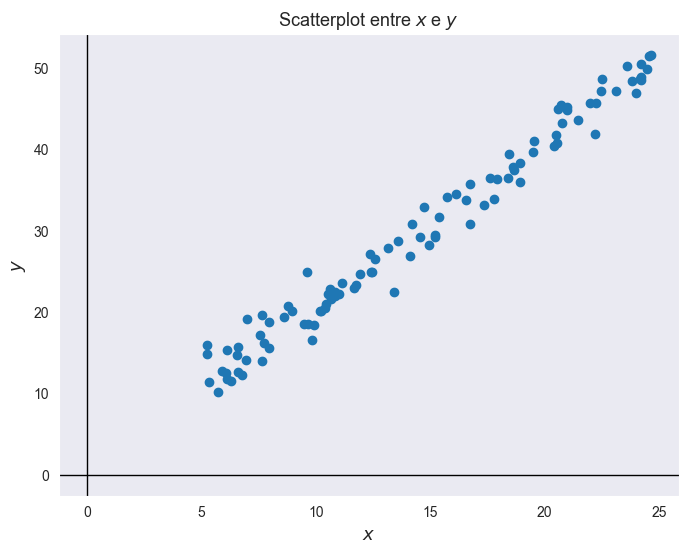

In [21]:
# Aplico Estimadores a datos aleatorios
b_dot   = beta_dot(x,y)
b_tilde = beta_tilde(x,y)

print("Beta del primer estimador es: ",b_dot.round(3))
print("Beta del segundo estimador es: ",b_tilde.round(3))

# Scatterplot entre x e y
fig, ax = plt.subplots(figsize=(8,6))
plt.scatter(x,y)
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
ax.set_title("Scatterplot entre $x$ e $y$", fontsize=13)
ax.set_xlabel("$x$", fontsize=13)
ax.set_ylabel("$y$", fontsize=13)
plt.show()

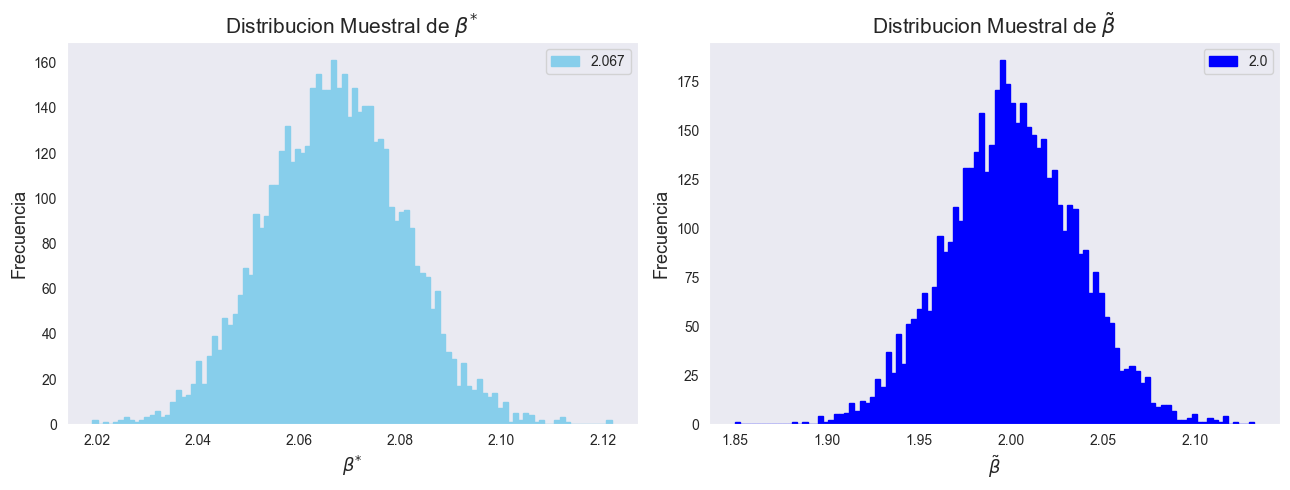

In [22]:
# Genero Almacenadores vacíos
b_dot_vec    = []
b_tilde_vec  = []

for n in range(1,sims):
  # Generación de Muestras Aleatorias
  x = uniform.rvs(loc=5, scale=20, size = nobs)
  e = norm.rvs(loc=0, scale=2, size = nobs)
  y = beta_0 + beta_1 * x + e

  # Estimadores
  b_dot_loop   = beta_dot(x,y)
  b_tilde_loop = beta_tilde(x,y)

  # Almaceno betas por iteración
  b_dot_vec   = np.append(b_dot_vec, b_dot_loop)
  b_tilde_vec = np.append(b_tilde_vec, b_tilde_loop)

# Genero los plot de la distribución acumulada e histogramas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5))

# Plots asociados a las curvas acumuladas
ax1.hist(b_dot_vec, bins=100, label=np.mean(b_dot_vec).round(3),color = "skyblue", ec="skyblue")
ax1.set_xlabel(r"$\beta^{*}$", fontsize = 13)
ax1.set_ylabel("Frecuencia", fontsize = 13)
ax1.set_title(r"Distribucion Muestral de $\beta^{*}$", fontsize=15)
ax1.legend(loc=1)

# Plot Asociados a los histogramas
ax2.hist(b_tilde_vec, bins=100, label=np.mean(b_tilde_vec).round(3), color = "blue", ec="blue")
ax2.set_xlabel(r"$\tilde{\beta}$", fontsize = 13)
ax2.set_ylabel("Frecuencia", fontsize = 13)
ax2.set_title(r"Distribucion Muestral de $\tilde\beta$", fontsize=15)
ax2.legend(loc=1)
plt.tight_layout()

**Ejercicio 🖍️** (Máxima Verosimilitud)

Sea el siguiente modelo de regresión lineal simple:

\begin{equation*}
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i, \quad \varepsilon_i \sim \mathcal{N}(0, \sigma^2)
\end{equation*}

Si consideramos el vector de parámetros como $\theta = (\beta_0, \beta_1, \sigma^2)$, podemos escribir la función de verosimilitud como: 

\begin{equation*}
L(\theta) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(y_i - \beta_0 - \beta_1 x_i)^2}{2\sigma^2} \right)
\end{equation*}

\begin{equation*}
\log L(\theta) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2
\end{equation*}

Estime los coeficientes $\beta_0, \beta_1, \sigma^2$ de la función log-verosilimitud

\begin{equation*}
\mathcal{L}(\theta) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^n(y_i - \beta_0 - \beta_1 x_i)^2
\end{equation*}

In [23]:
from scipy.optimize import minimize

y = df['Precio_TLT'].values
x = df['Tasa10Y'].values

def neg_log_likelihood(params, x, y):
    beta_0, beta_1, log_sigma = params
    sigma = np.exp(log_sigma)  # garantiza que sigma > 0
    residuals = y - (beta_0 + beta_1 * x)
    n = len(y)
    loglike = -0.5 * n * np.log(2 * np.pi * sigma**2) - 0.5 * np.sum(residuals**2) / sigma**2
    return -loglike  # minimizar negativo

# Valores iniciales (pueden ser cualquier número razonable)
init_params = [0.0, 0.0, 0.0]  # beta0, beta1, log_sigma

# Minimización
res = minimize(neg_log_likelihood, init_params, args=(x, y))

# Recuperar parámetros estimados
beta_0_mle, beta_1_mle, log_sigma_mle = res.x
sigma_mle = np.exp(log_sigma_mle)

# Imprimir resultados
print(f"Estimación por máxima verosimilitud:")
print(f"Intercepto = {beta_0_mle:.4f}")
print(f"Pendiente = {beta_1_mle:.4f}")
print(f"Sigma  = {sigma_mle:.4f}")

Estimación por máxima verosimilitud:
Intercepto = 142.8554
Pendiente = -14.8853
Sigma  = 8.9560


Consideramos el caso de un modelo de regresión simple 

\begin{equation*}
y_i = \beta_0 + \beta_1 x_i + \epsilon_i
\end{equation*}

Podemos plantearnos las siguientes preguntas : ¿Hay evidencia de que el valor de $
beta_1$ es 2?, ¿podemos considerar que $\beta_1$ es mayor que cero?. En este caso, nos estamos planteando las siguientes hipótesis. ¿$\beta_1 = 2$?,  ¿$\beta_1 > 0$?. En el contraste de hipótesis. se representan dos hipótesis: La hipótesis nula ($\textsf{H}_0$) y la hipótesis alternativa ($\textsf{H}_1$).

* La Hipótesis Nula siempre con igualdad , pues reprenta el valor que se desea contrastar $\textsf{H}_0 : \beta_1 = 2$
* La Hipótesis alternativa $\textsf{H}_1$ puede ser de tres tipos.
  * $\textsf{H}_1 \neq 2 $
  * $\textsf{H}_1 > 2$
  * $\textsf{H}_1 < 2$

Los contrastes de hipótesis que estaremos haciendo son de tres tipos 

* **Tipo 1** 
  
    \begin{equation*}
    \begin{aligned}
    \textsf{H}_0 &: \beta_1 = \beta_1 ^ 0 \\
    \textsf{H}_1 &: \beta_1 \neq \beta_1 ^ 0
    \end{aligned}
    \end{equation*}

* **Tipo 2**

    \begin{equation*}
    \begin{aligned}
    \textsf{H}_0 &: \beta_1 = \beta_1 ^ 0 \\
    \textsf{H}_1 &: \beta_1 > \beta_1 ^ 0
    \end{aligned}
    \end{equation*}

* **Tipo 3**

    \begin{equation*}
    \begin{aligned}
    \textsf{H}_0 &: \beta_1 = \beta_1 ^ 0 \\
    \textsf{H}_1 &: \beta_1 < \beta_1 ^ 0
    \end{aligned}
    \end{equation*}

La conclusión de todo contraste de hipótesis es si se rechaza o no la hipótesis nula según los datos de la muestra. *NUNCA* en la conclusión diremos que se acepta la hipótesis nula. La decisión de rechazar o no la hipótesis nula se realiza según una regla de decisión.

Esta regla es diferente según el tipo de contraste (según el tipo de hipótesis alternativa). En todos los casos, las reglas se construyen a partir del mismo estadístico. Un estadístico es una variable cuya distribución sólo depende de parámetros conocidos y que se construye a partir de los estimadores MCO de $\beta$ y $\sigma^2$ y la hipótesis nula, y por lo tanto, no va a depender de la hipótesis alternativa.

Recordemos que:

\begin{equation*}
\frac{\widehat{\beta_j}-\beta_j}{\textsf{SE}(\beta_j)} \sim t_{n-k-1} 
\end{equation*}

Bajo la hipótesis nula: $\textsf{H}_0: \beta_{j} = \beta_{j}^0$

\begin{equation*}
\frac{\widehat{\beta_j}-\beta_{j}^{0}}{\textsf{SE}(\beta_j)} \sim t_{n-k-1} 
\end{equation*}

Observa que podemos calcular el valor del estadístico a partir de los valores de una muestra y el valor considerado en la hipótesis nula. Las reglas de decisión de un contraste se basan en determinar una región de rechazo de la hipótesis nula.

Es decir, determinar un conjunto de valores del estadístico tal que si el valor del estadístico obtenido a partir de la muestra está dentro de ese conjunto entonces rechazamos la hipótesis nula, y si no lo está no rechazamos la hipótesis nula.
La región de rechazo depende de la hipótesis alternativa.

* **Tipo 1** En el contraste 
  
    \begin{equation*}
    \begin{aligned}
    \textsf{H}_0 &: \beta_1 = \beta_1 ^ 0 \\
    \textsf{H}_1 &: \beta_1 \neq \beta_1 ^ 0
    \end{aligned}
    \end{equation*}

    Se rechaza la hipótesis nula $\textsf{H}_0$ para un nivel de significancia $\alpha$ si el verdadero valor del estadístico $t$ cumple: 

    \begin{equation*}
    |t| > t_{n-k-1, \alpha/2}
    \end{equation*}

    Donde $t_{n-k-1, \alpha/2}$ (tambien conocido como valor crítico) es el valor de la distribución $t$-student con $n-k-1$ grados de libertad que tiene a su derecha con probabilidad $\alpha/2$

* **Tipo 2** En el contraste

    \begin{equation*}
    \begin{aligned}
    \textsf{H}_0 &: \beta_1 = \beta_1 ^ 0 \\
    \textsf{H}_1 &: \beta_1 > \beta_1 ^ 0
    \end{aligned}
    \end{equation*}

    Se rechaza la hipótesis nula $\textsf{H}_0$ para un nivel de significancia $\alpha$ si el verdadero valor del estadístico $t$ cumple: 

    \begin{equation*}
    t > t_{n-k-1, \alpha}
    \end{equation*}

    Donde $t_{n-k-1, \alpha}$ es el valor de la distribución $t$-student con $n-k-1$ grados de libertad que tiene a su derecha con probabilidad $\alpha$

* **Tipo 3** En el contraste

    \begin{equation*}
    \begin{aligned}
    \textsf{H}_0 &: \beta_1 = \beta_1 ^ 0 \\
    \textsf{H}_1 &: \beta_1 < \beta_1 ^ 0
    \end{aligned}
    \end{equation*}

    Se rechaza la hipótesis nula $\textsf{H}_0$ para un nivel de significancia $\alpha$ si el verdadero valor del estadístico $t$ cumple: 

    \begin{equation*}
    t < -t_{n-k-1, \alpha}
    \end{equation*}

    Donde $t_{n-k-1, \alpha}$ es el valor de la distribución $t$-student con $n-k-1$ grados de libertad que tiene a su derecha con probabilidad $\alpha$


**Ejercicio 🖍️** ¿Explica la Tasa a 10 años el precio de TLT?

In [24]:
model = smf.ols(formula = 'Precio_TLT ~ Tasa10Y', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Precio_TLT   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     247.4
Date:                Tue, 17 Jun 2025   Prob (F-statistic):           1.77e-29
Time:                        15:59:39   Log-Likelihood:                -390.02
No. Observations:                 108   AIC:                             784.0
Df Residuals:                     106   BIC:                             789.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    142.8554      2.335     61.178      0.000     138.226     147.485
Tasa10Y      -14.8853      0.946    -15.728      0.000     -16.762     -13.009
==============================================================================
Omnibus:                       24.274   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.852
Skew:                          -0.383   Prob(JB):                       0.0197
Kurtosis:                       1.924   Cond. No.                         7.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$\textsf{H}_0$ indica si la tasa a 10 años no explica el precio de TLT, mientras que $\textsf{H}_1$ indica que la tasa si tiene un efecto sobre el precio. La prueba de hipótesis a contrastar es:

\begin{equation*}
\begin{aligned}
\textsf{H}_0 &: \beta_1 =  0 \\
\textsf{H}_1 &: \beta_1 \neq 0
\end{aligned}
\end{equation*}

El estadístico de prueba es : 

\begin{equation*}
\frac{\widehat{\beta_1} - 0}{\textsf{SE}(\beta_1)} = \frac{-14.8853}{0.946} = -15.728
\end{equation*}

La distribución bajo $\textsf{H}_0$ : $t_{n-k-1} = t_{106}$

In [25]:
model.df_resid

106.0

In [26]:
from scipy.stats import t

df_resid = model.df_resid # n-k (en k contiene ya el 1 por el intercepto)

alpha = 0.05 
t_critico = t.ppf(1-alpha/2, df = df_resid)

print(f"Valor crítico t : {t_critico:.4f}")

Valor crítico t : 1.9826


Se rechaza la hipótesis nula $\textsf{H}_0$ para un nivel de significancia $\alpha$ si el verdadero valor del estadístico $t$ cumple: 

\begin{equation*}
|t| > t_{n-k-1, \alpha/2}
\end{equation*}

$|t_{\beta_1}| = |-15.728| = 15.728 > t_{c}=1.9826$

Por tanto, existe evidencia estadísticamente significativa de que el coeficiente $\beta_1$ es distinto de 0, es decir, la variable *Tasa10Y* tiene un efecto significativo sobre el *Precio_TLT*. Ademas, $R^2 = 0.70$ indica que el modelo explica el 70% de la variabilidad del precio de TLT. La pendiente negativa $\beta_1 \approx -14.89$ sugiere que una subida de 1 punto en la tasa a 10 años se asocia con una caída de aproximadamente 14.89 en el precio del ETF TLT, lo cual es coherente con la teoría financiera.

## 🦕 Regresión Lineal Múltiple

Próxima clase !